This is an assignment project where we have to understand the data set and analyse the data set.


##Section 1 : Data Mining (sorting through large data sets to identify patterns and relationships that can help solve problems through data analysis.)


This dataset is from a database of 288 cases from the Human Genetics Unit (HGU) of the Faculty of Medicine, Colombo, Sri Lanka. It's collected from Alpha thalassemia carrier children and their family members screened from 2016 to 2020.

** There are 15 independent variables and apart from Sex('male' and 'female') all others are continuous variables in float format(identifier in brackets):**




1. Sex
2. Hemoglobin concentration in grams per decilitre - g/dL (hb)
3. Pack cell volume/hematocrit in % (pcv)
4. Red blood cell volume in 10^12/L (rbc)
5. Mean cell volume in femtolitres-fl (mcv)
6. Mean corpuscular hemoglobin in picograms-pg (mch)
7. Mean corpuscular hemoglobin concentration in grams per decilitre-g/dL (mchc)
8. Red blood cell distribution width in % (rdw)
9. Total white blood cell count in 10^6/L (wbc)with white blood cell types in % - (neut, lymph)
10. Total platelet count in 10^6/L (plt)
11.  Hemobglobin A, A2 and F in % from HPLC testing (hba, hba2,hbf)
12. The target variable is phenotype, alpha carrier and normal (binary categorical)




In [ ]:
## Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [ ]:
## Getting the data from kaggle
url ="https://raw.githubusercontent.com/Julimooli/Machine_learning/main/Thalassemia_data.csv"
df= pd.read_csv(url)
df.head()

,sex,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf,phenotype
0,female,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.0,33.0,309.0,88.5,2.6,0.11,alpha carrier
1,male,10.8,26.6,4.28,62.1,25.3,40.8,19.8,10.3,49.4,43.1,687.0,87.8,2.4,0.90,alpha carrier
2,female,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.0,33.0,309.0,88.5,2.6,0.10,alpha carrier
3,male,14.5,43.5,5.17,84.0,28.0,33.4,12.1,11.9,31.0,50.0,334.0,86.8,2.8,0.30,alpha carrier
4,male,11.5,34.4,5.02,68.7,22.9,33.4,15.7,20.4,67.0,30.0,596.0,86.3,2.4,1.30,alpha carrier


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        203 non-null    object 
 1   hb         203 non-null    float64
 2   pcv        203 non-null    float64
 3   rbc        202 non-null    float64
 4   mcv        203 non-null    float64
 5   mch        201 non-null    float64
 6   mchc       203 non-null    float64
 7   rdw        203 non-null    float64
 8   wbc        203 non-null    float64
 9   neut       203 non-null    float64
 10  lymph      203 non-null    float64
 11  plt        203 non-null    float64
 12  hba        203 non-null    float64
 13  hba2       203 non-null    float64
 14  hbf        203 non-null    float64
 15  phenotype  203 non-null    object 
dtypes: float64(14), object(2)
memory usage: 25.5+ KB


In [ ]:
df.describe()

,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf
count,203.000000,203.000000,202.000000,203.000000,201.000000,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,12.111823,36.676757,5.057432,74.167128,24.200498,32.497322,14.848380,9.188423,46.08398,43.516162,328.265663,86.515666,2.579554,0.664367
std,1.757800,4.821295,0.585929,9.280344,3.805844,1.979277,2.381027,2.591782,11.79773,11.992417,114.284337,2.436432,0.312889,0.739903
min,7.600000,22.100000,2.410000,47.700000,11.100000,21.100000,10.800000,2.300000,6.20000,10.300000,100.000000,68.000000,0.300000,0.000000
25%,10.900000,33.300000,4.700000,66.950000,21.200000,31.550000,13.300000,7.500000,43.00000,37.000000,256.000000,85.200000,2.500000,0.300000
50%,12.000000,36.000000,5.025000,73.800000,24.100000,32.500000,14.700000,8.915278,47.56500,41.537931,310.000000,86.523291,2.600000,0.537931
75%,13.350000,39.150000,5.437500,81.900000,26.800000,33.446296,15.950000,10.550000,52.15000,46.000000,379.500000,87.365714,2.700000,0.769231
max,16.700000,51.100000,6.770000,91.700000,35.600000,40.800000,28.800000,20.400000,77.50000,87.000000,1107.000000,98.400000,3.300000,5.800000


In [ ]:
## Removing null values:
df.dropna(inplace=True)
df.isnull().sum()

,0
sex,0
hb,0
pcv,0
rbc,0
mcv,0
mch,0
mchc,0
rdw,0
wbc,0
neut,0


In [ ]:
## Converting  Phenotype column into numerical and droping null values (only 3 rows)
df['sex']= df['sex'].map({'male': 1, 'female': 0})
df['phenotype'] = df['phenotype'].map({'alpha carrier': 1, 'normal': 0})

In [ ]:
## Checking for duplicates row
df.duplicated().sum()

0

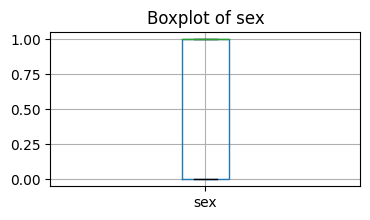

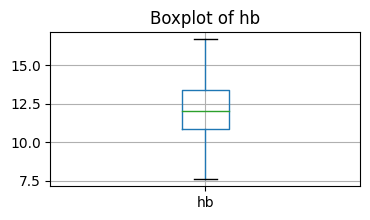

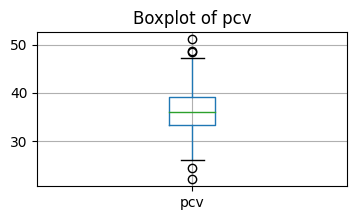

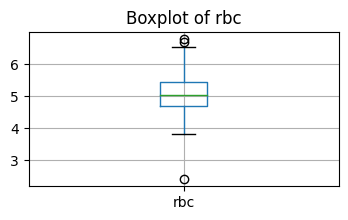

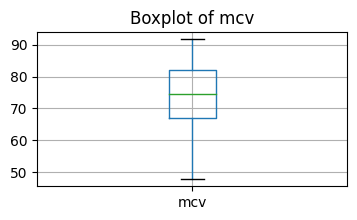

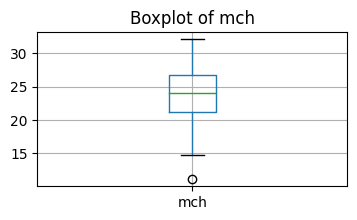

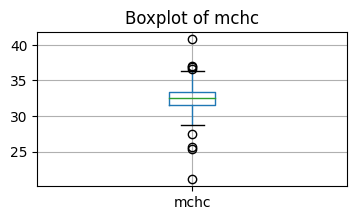

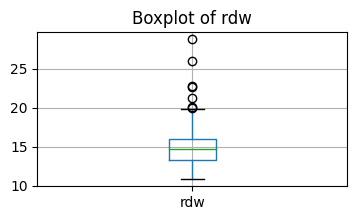

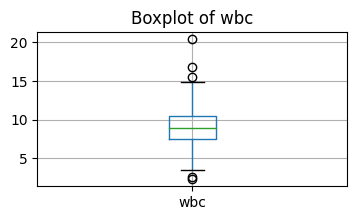

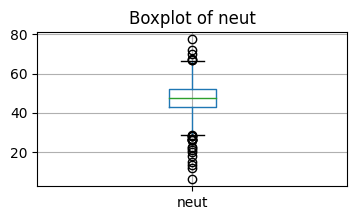

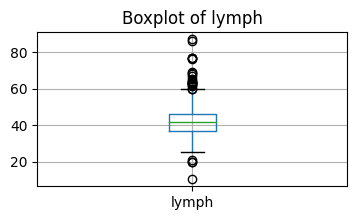

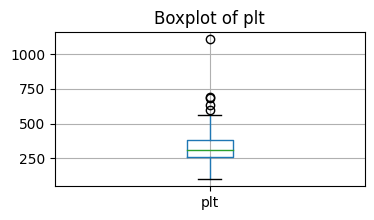

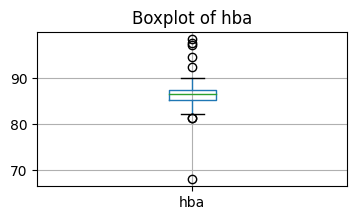

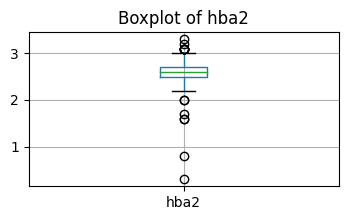

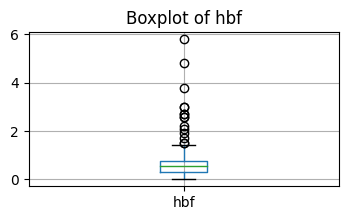

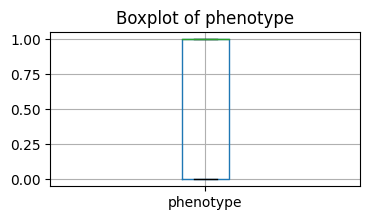

In [ ]:
## For outlires
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(4, 2))
    df.boxplot([column])
    plt.title(f'Boxplot of {column}')
    plt.show()


**The data has all numerical column with no null values, no duplicate rows and outliers checked.**

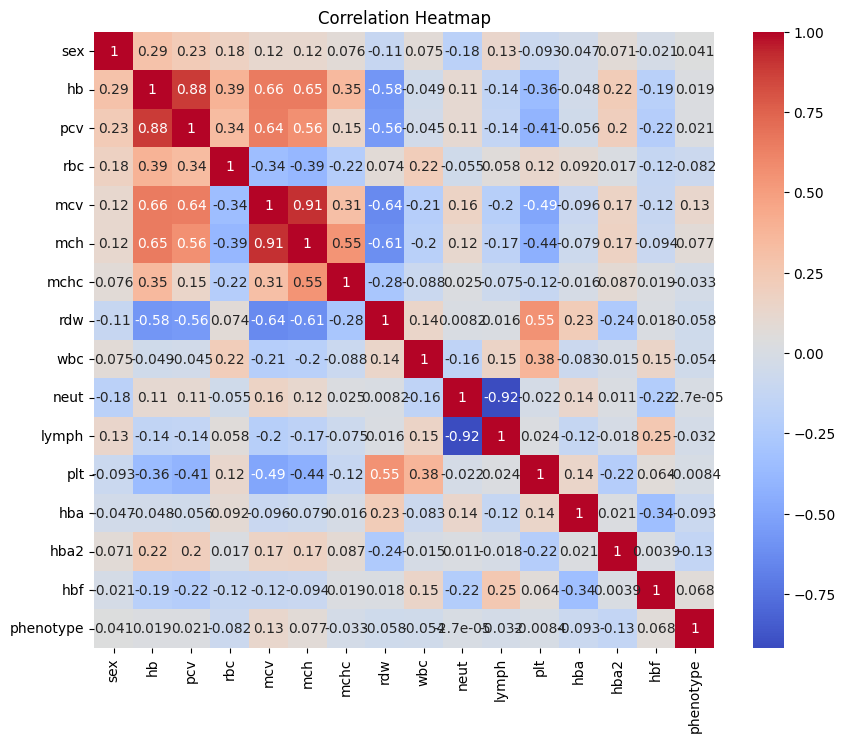

In [ ]:
## Checking correlation among the dataset with the help of heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Section 2 : Data Exploration (The statistical process that helps understand the data before analyzing it)


**Univariate Analysis**

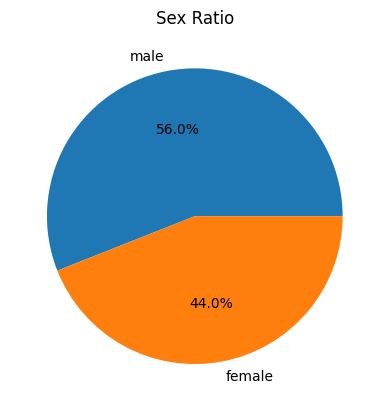

In [ ]:
## What is the sex ratio of the data set
sex_count= df['sex'].value_counts()
plt.pie(sex_count, labels=['male', 'female'], autopct='%1.1f%%')
plt.title('Sex Ratio')
plt.show()


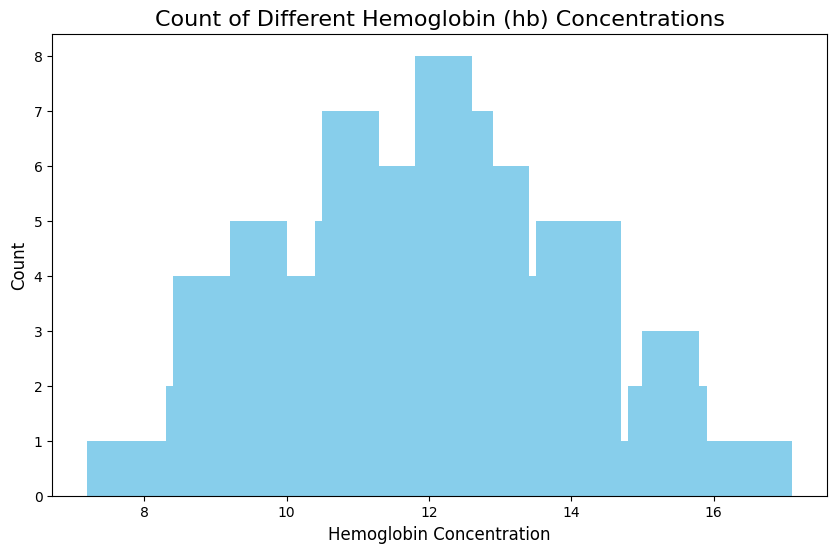

In [ ]:
## Different concentration of haemoglobin present in the data
hb_count = df['hb'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(hb_count.index, hb_count.values, color='skyblue')
plt.title('Count of Different Hemoglobin (hb) Concentrations', fontsize=16)
plt.xlabel('Hemoglobin Concentration', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()



**Bivariate analysis**

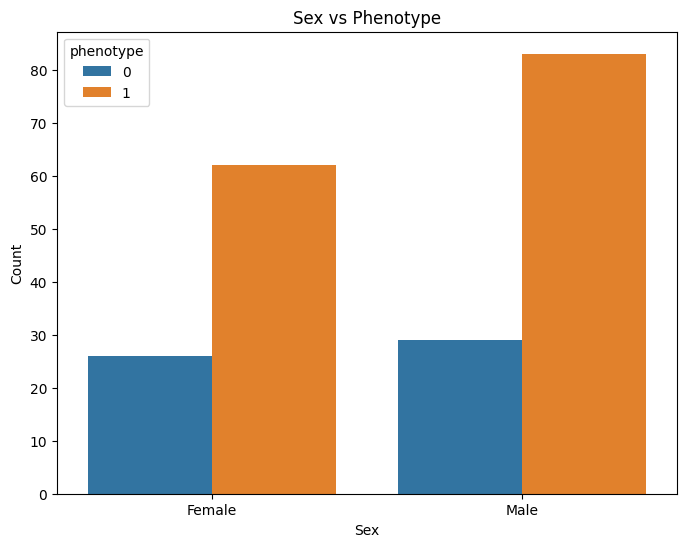

In [ ]:
## Is there any relationship between sex and phenotype of the person
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='phenotype', data=df)
plt.title('Sex vs Phenotype')
plt.xlabel('Sex')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Count')
plt.show()

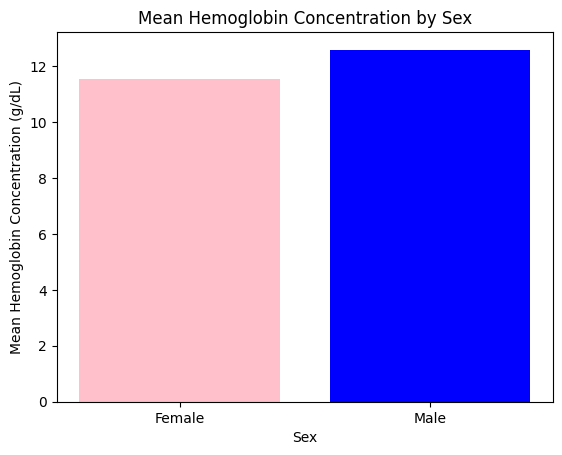

T-statistic: -4.333591079706448
P-value: 2.3318021280886297e-05
There is a statistically significant difference in hemoglobin concentration between the two groups.
Males tend to have higher hemoglobin concentration than females.


In [ ]:
## Is there any corelation between haemoglobin concentartion and sex
# Group the data by sex and calculate the mean hemoglobin concentration for each group.
hb_by_sex = df.groupby('sex')['hb'].mean()

plt.bar(hb_by_sex.index, hb_by_sex.values, color=['pink', 'blue'])
plt.title('Mean Hemoglobin Concentration by Sex')
plt.xlabel('Sex')
plt.ylabel('Mean Hemoglobin Concentration (g/dL)')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

## Test to check corelation of sex and haemoglobin concentration.
female_hb = df[df['sex'] == 0]['hb']
male_hb = df[df['sex'] == 1]['hb']

t_statistic, p_value = ttest_ind(female_hb, male_hb)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# If the p-value is less than 0.05, we can conclude that there is a statistically significant difference in hemoglobin concentration between the two groups.
if p_value < 0.05:
    print("There is a statistically significant difference in hemoglobin concentration between the two groups.")
    if hb_by_sex[1] > hb_by_sex[0]:
        print("Males tend to have higher hemoglobin concentration than females.")
    else:
        print("Females tend to have higher hemoglobin concentration than males.")
else:
    print("There is no statistically significant difference in hemoglobin concentration between the two groups.")


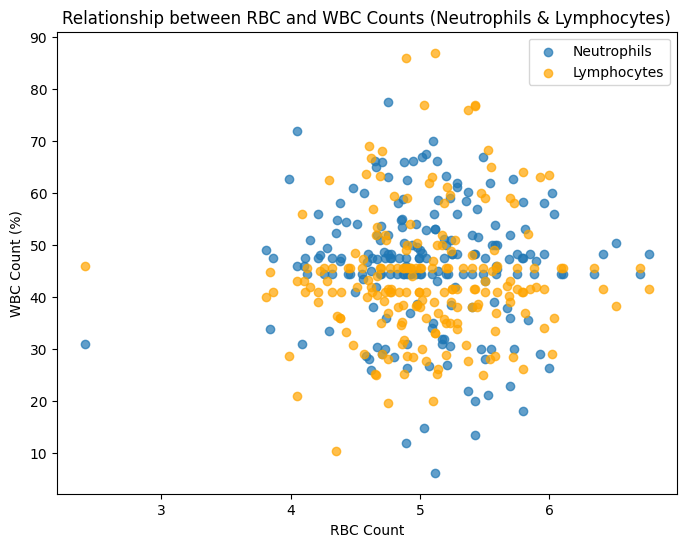

Correlation between RBC and WBC count: 0.2150774637405326
There is a weak positive corelation 


In [ ]:
## Is WBC Count related with  RBC count

plt.figure(figsize=(8, 6))
plt.scatter(df['rbc'], df['neut'], label='Neutrophils', alpha=0.7)
plt.scatter(df['rbc'], df['lymph'], label='Lymphocytes', alpha=0.7, color='orange')
plt.xlabel('RBC Count')
plt.ylabel('WBC Count (%)')
plt.title('Relationship between RBC and WBC Counts (Neutrophils & Lymphocytes)')
plt.legend()
plt.show()
# A new column representing the total WBC count
df['total_wbc'] = (df['neut'] + df['lymph']) * df['wbc'] / 100

# The correlation between RBC and total WBC count
correlation = df['rbc'].corr(df['total_wbc'])
print(f"Correlation between RBC and WBC count: {correlation}")
print("There is a weak positive corelation ")

**Conclusion**


1. Haemoglobin concentration follows normal distribution.
2. Thalassemia is not sex linked disease (bcz male and female both have equal chance of getting the disease)
3. Males tend to have higher hemoglobin concentration than females. ( There is corelation between sex and haemoglobin concentration)